Exercise-03: Using MLR and Feature Engineering to discover structures hidden in the data 
 (Read in the data provided in challenge.csv)

In [15]:
#1-import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [17]:
#seaborn  # data visualization
sns.set()

In [18]:
#read the data and get structure of data
df=pd.read_csv('challenge.csv')
df.head(5)
#df.info() #df.columns #df.describe()
df.shape
X1=df['x1']
X2=df['x2']
Y1=df['y']
df.columns

Index(['y', 'x1', 'x2'], dtype='object')

In [52]:
df.isnull().any()  # checking if there is any null value in data

y     False
x1    False
x2    False
dtype: bool

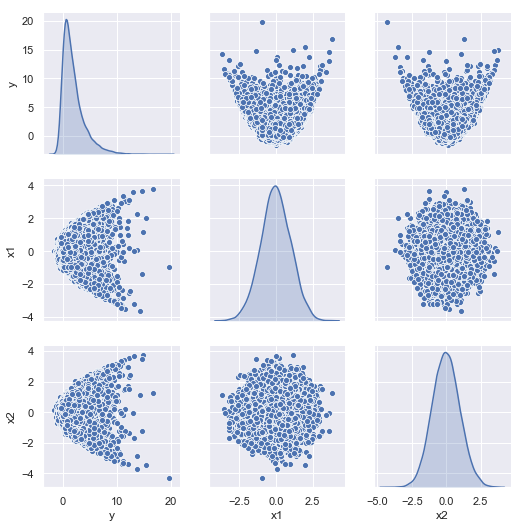

In [20]:
#2.data visualization
sns.pairplot(df,diag_kind='kde')  # scatter matrix for variables 

Comment : From the above scatter plots we can see that the relation between x1,& Y and X2 & Y is
        parabolic. so there is no linear relation between them so a linear model will not be good for
        fitting the data.we will have to go for non-linear models such as  quardatic, qubic etc.

In [21]:
#correlation 
df.corr()

,y,x1,x2
y,1.000000,-0.010743,0.030855
x1,-0.010743,1.000000,0.004845
x2,0.030855,0.004845,1.000000


In [22]:
#simple multiple linear regression OLS
import statsmodels.api as sm
X = df[['x1','x2']]
Y = df['y']
X = sm.add_constant(X)
model_simple = sm.OLS(Y,X).fit()
model_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.357
Date:                Tue, 10 Sep 2019   Prob (F-statistic):            0.00473
Time:                        23:12:54   Log-Likelihood:                -21362.
No. Observations:               10000   AIC:                         4.273e+04
Df Residuals:                    9997   BIC:                         4.275e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0091      0.020     98.043      0.000       1.969       2.049
x1            -0.0221      0.020     -1.090      0.276      -0.062       0.018
x2             0.0640      0.021      3.092      0.002       0.023       0.104
==============================================================================
Omnibus:                     3450.407   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12963.309
Skew:                           1.708   Prob(JB):                         0.00
Kurtosis:                       7.409   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comment: We can see form the above results that R^2 value is very low and F-statistics value is 
    also very less that mean model contains large regression error so we can not use simple
    linear regression for modeling this given data.we need to opt non-linear regressions for this.

3.Perform “feature engineering” to create additional predictors to be able to fit a regression 
model on the data. 
a-Take the following two approaches: a. Use a mixture of polynomial, trigonometric, logarithmic / exponential predictors 
b- Use only polynomial predictors 

In [38]:
#feature engineering 
#derivative of X1 and X2 to make new features  #mixture of variable types 18 variable
X12,X22=X1**2,X2**2        #X12=X1^2,X22=X2^2
X13,X23=X1**3,X2**3     #X13=X1^3,X23=X2^3
X14,X24 =X1**4,X2**4    #X14=X1^4,X24=X2^4
X15,X25=X1**5,X2**5       #X15=X1^5,X25=X2^5
X16,X26=X1**6,X2**6       #X16=X1^6,X26=X2^6
X17,X27=X1**7,X2**7       #X17=X1^7,X27=X2^7
X1_log,X2_log =np.log(X1+10),np.log(X2+10)   #lograthm
X1_sin,X2_sin =np.sin(X1),np.sin(X2)    #sin
X1_cos,X2_cos =np.cos(X1),np.cos(X2)
X1_tan,X2_tan =np.tan(X1),np.tan(X2) #tan
X1_tanh,X2_tanh =np.tanh(X1),np.tanh(X2)  #tanh
X1_exp,X2_exp =np.exp(X1),np.exp(X2)   #exponential

Comment on the above observation

In [39]:
f=pd.DataFrame([Y1,X1,X2,X12,X22,X13,X23,X1_log,X2_log,X1_sin,X2_sin,X1_cos,X2_cos,X1_tan,X2_tan,X1_tanh,X2_tanh,X1_exp,X2_exp]).transpose()
f.columns=['Y1','X1','X2','X12','X22','X13','X23','X1_log','X2_log','X1_sin','X2_sin','X1_cos','X2_cos','X1_tan','X2_tan','X1_tanh','X2_tanh','X1_exp','X2_exp']
f.head()


,Y1,X1,X2,X12,X22,X13,X23,X1_log,X2_log,X1_sin,X2_sin,X1_cos,X2_cos,X1_tan,X2_tan,X1_tanh,X2_tanh,X1_exp,X2_exp
0,1.668338,-0.626454,-0.804332,0.392444,0.646949,-0.245848,-0.520362,2.237891,2.218733,-0.586276,-0.720367,0.810112,0.693593,-0.723697,-1.038602,-0.555606,-0.666451,0.534484,0.447387
1,1.044322,0.183643,-1.056526,0.033725,1.116246,0.006193,-1.179343,2.320783,2.190924,0.182613,-0.870652,0.983185,0.491900,0.185736,-1.769977,0.181606,-0.784330,1.201587,0.347662
2,1.637654,-0.835629,-1.035396,0.698275,1.072044,-0.583499,-1.109990,2.215323,2.193284,-0.741718,-0.860064,0.670712,0.510186,-1.105868,-1.685787,-0.683487,-0.776063,0.433602,0.355086
3,4.529557,1.595281,-1.185560,2.544921,1.405553,4.059863,-1.666368,2.450598,2.176391,0.999700,-0.926710,-0.024482,0.375778,-40.834045,-2.466111,0.920955,-0.829197,4.929713,0.305575
4,0.819020,0.329508,-0.500440,0.108575,0.250440,0.035776,-0.125330,2.335005,2.251246,0.323577,-0.479811,0.946202,0.877372,0.341975,-0.546873,0.318078,-0.462463,1.390284,0.606264


In [37]:
Xv=f.iloc[:,1:19]
Yv=f.iloc[:,0]
import statsmodels.api as sm
Xv=sm.add_constant(Xv)
MLR_model = sm.OLS(Yv,Xv).fit()
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     9002.
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:36:46   Log-Likelihood:                -7132.6
No. Observations:               10000   AIC:                         1.430e+04
Df Residuals:                    9981   BIC:                         1.444e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1178.4012   3131.720     -0.376      0.707   -7317.203    4960.401
X1          -101.3859    115.234     -0.880      0.379    -327.268     124.496
X2            50.4908     71.366      0.707      0.479     -89.402     190.383
X12            6.1904      5.896      1.050      0.294      -5.367      17.748
X22           -1.5016      3.604     -0.417      0.677      -8.566       5.563
X13           -0.5296      0.629     -0.842      0.400      -1.762       0.703
X23            0.2971      0.419      0.709      0.478      -0.525       1.119
X1_log      1020.8651   1161.786      0.879      0.380   -1256.470    3298.200
X2_log      -509.2448    720.661     -0.707      0.480   -1921.885     903.396
X1_sin        -1.3394      1.551     -0.864      0.388      -4.379       1.701
X2_sin         0.6900      1.192      0.579      0.563      -1.647       3.027
X1_cos         0.4040      0.500      0.808      0.419      -0.577       1.384
X2_cos        -0.1023      0.258     -0.396      0.692      -0.608       0.403
X1_tan      8.668e-05   5.57e-05      1.556      0.120   -2.25e-05       0.000
X2_tan     -2.477e-05   2.08e-05     -1.189      0.235   -6.56e-05    1.61e-05
X1_tanh        0.4369      0.345      1.267      0.205      -0.239       1.113
X2_tanh       -0.0554      0.310     -0.179      0.858      -0.662       0.552
X1_exp         0.2358      0.299      0.788      0.431      -0.351       0.823
X2_exp        -0.1866      0.226     -0.826      0.409      -0.630       0.256
==============================================================================
Omnibus:                        1.643   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.607
Skew:                           0.028   Prob(JB):                        0.448
Kurtosis:                       3.027   Cond. No.                     1.59e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#only polynomial feature
f2=pd.DataFrame([Y1,X1,X2,X12,X22,X13,X23,X14,X24,X15,X25,X16,X26]).transpose()
f2.columns=['Y1','X1','X2','X12','X22','X13','X23','X14','X24','X15','X25','X16','X26']
f2.head()


,Y1,X1,X2,X12,X22,X13,X23,X14,X24,X15,X25,X16,X26
0,1.668338,-0.626454,-0.804332,0.392444,0.646949,-0.245848,-0.520362,0.154013,0.418543,-0.096482,-0.336648,0.060441,0.270776
1,1.044322,0.183643,-1.056526,0.033725,1.116246,0.006193,-1.179343,0.001137,1.246006,0.000209,-1.316437,0.000038,1.390850
2,1.637654,-0.835629,-1.035396,0.698275,1.072044,-0.583499,-1.109990,0.487588,1.149279,-0.407443,-1.189959,0.340471,1.232078
3,4.529557,1.595281,-1.185560,2.544921,1.405553,4.059863,-1.666368,6.476622,1.975580,10.332031,-2.342170,16.482490,2.776783
4,0.819020,0.329508,-0.500440,0.108575,0.250440,0.035776,-0.125330,0.011789,0.062720,0.003884,-0.031388,0.001280,0.015708


In [42]:
Xp=f2.iloc[:,1:13]
Yp=f2.iloc[:,0]
import statsmodels.api as sm
Xp=sm.add_constant(Xp)
MLR_model_p = sm.OLS(Yp,Xp).fit()
MLR_model_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.350e+04
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:45:29   Log-Likelihood:                -7136.1
No. Observations:               10000   AIC:                         1.430e+04
Df Residuals:                    9987   BIC:                         1.439e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0029      0.009     -0.313      0.754      -0.021       0.015
X1             0.0027      0.011      0.244      0.807      -0.019       0.024
X2             0.0082      0.011      0.774      0.439      -0.012       0.029
X12            1.0053      0.013     80.351      0.000       0.981       1.030
X22            1.0050      0.011     88.208      0.000       0.983       1.027
X13           -0.0038      0.006     -0.676      0.499      -0.015       0.007
X23            0.0021      0.005      0.414      0.679      -0.008       0.012
X14           -0.0008      0.004     -0.201      0.841      -0.008       0.007
X24        -9.729e-05      0.003     -0.031      0.976      -0.006       0.006
X15            0.0010      0.001      1.783      0.075   -9.82e-05       0.002
X25           -0.0003      0.000     -0.668      0.504      -0.001       0.001
X16         -8.95e-05      0.000     -0.323      0.746      -0.001       0.000
X26        -3.498e-05      0.000     -0.174      0.862      -0.000       0.000
==============================================================================
Omnibus:                        1.742   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.707
Skew:                           0.029   Prob(JB):                        0.426
Kurtosis:                       3.026   Cond. No.                         323.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Summary - from the above beta values and  it is clear that only X12 and X22 will be needed others are
approx to zero so they may not be required. Also from the p-values , it is clear that only these are 
significant

In [43]:
#new model
Xn=f2.loc[:,['X12','X22']]   #only x1^2 and x2^2 terms are teken as per above data
Yn=Yp
Xn=sm.add_constant(Xn)
MLR_model_n = sm.OLS(Yn,Xn).fit()
MLR_model_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 8.092e+04
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:49:49   Log-Likelihood:                -7146.3
No. Observations:               10000   AIC:                         1.430e+04
Df Residuals:                    9997   BIC:                         1.432e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0031      0.007      0.446      0.656      -0.011       0.017
X12            0.9964      0.003    289.366      0.000       0.990       1.003
X22            1.0033      0.004    283.997      0.000       0.996       1.010
==============================================================================
Omnibus:                        1.769   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.735
Skew:                           0.030   Prob(JB):                        0.420
Kurtosis:                       3.025   Cond. No.                         3.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 so only quardatic terms x1^2 and x2^2 are needed to describe the model of data. so it is the best model